In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import brickschema
import datetime
from relaxation_graphs.fast_relaxation_graph import *
from evaluation.similarity_score import *
import uuid
import pickle
from rdflib import URIRef, Literal, BNode
from queries.mortar import queries as q1
%matplotlib inline

In [3]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 32}

matplotlib.rc('font', **font)

In [51]:
with open("metrics.json") as fp:
    metrics = json.load(fp)

with open("metrics_all_buildings.json") as fp:
    metrics = json.load(fp)
    
sim_df = pd.read_csv('similarity_metrics.csv')

    
useful_queries = [4, 8, 9, 10, 11, 12, 15]
useful_queries2 = [4, 9, 11, 12, 15]
useful_buildings = range(6)

files = os.listdir('Data - Brick models/')
brick_models = []

with open("brick_models.pkl", 'rb') as fp:
    brick_models = pickle.load(fp)
    

In [5]:
df = pd.read_csv('results/level_query_buildings.csv')

In [34]:
df_level0 = df.loc[df.level==0]
df_level1 = df.loc[df.level==1]
df_level2 = df.loc[df.level==2]
df_level3 = df.loc[df.level==3]
df_level4 = df.loc[df.level==4]
df_level5 = df.loc[df.level==5]

In [52]:
df0 = df.loc[df.level==0][['q',  'unique_buildings']].set_index('q')
df0 = df0.loc[useful_queries2]


In [161]:
df1 = df.loc[df.level==1][['q',  'unique_buildings']].set_index('q')
df1 = df1.loc[useful_queries2]
df2 = df.loc[df.level==2][['q',  'unique_buildings']].set_index('q')
df2 = df1.loc[useful_queries2]
df3 = df.loc[df.level==3][['q',  'unique_buildings']].set_index('q')
df3 = df1.loc[useful_queries2]
df4 = df.loc[df.level==4][['q',  'unique_buildings']].set_index('q')
df4 = df1.loc[useful_queries2]
df5 = df.loc[df.level==5][['q',  'unique_buildings']].set_index('q')
df5 = df5.loc[useful_queries2]

df_after_relax = df.loc[df.level!=0][['q', 'unique_buildings']]
df_after_relax = df_after_relax.groupby('q').max()
df_after_relax = df_after_relax.loc[useful_queries2]

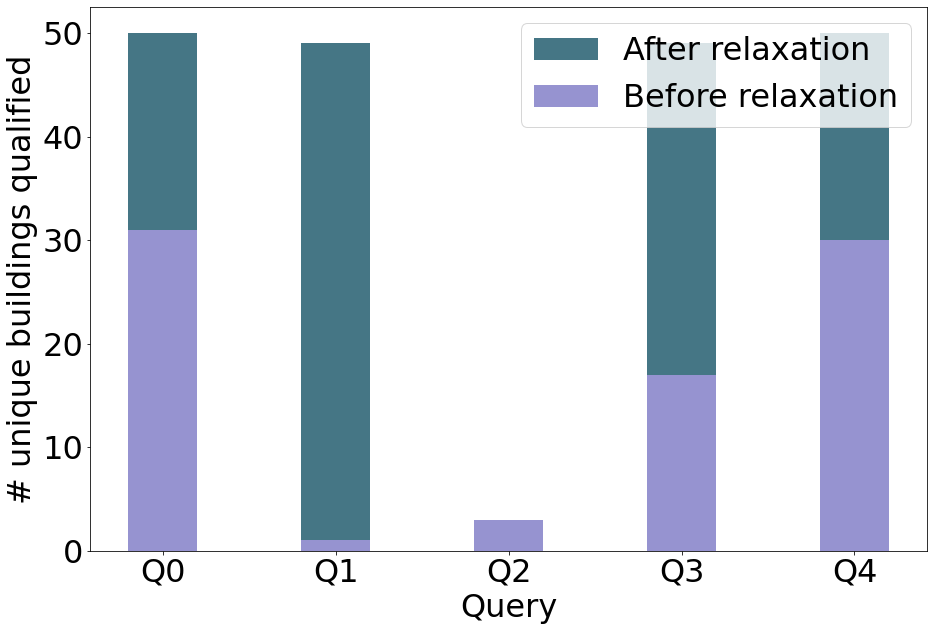

In [163]:
plt.Figure()
plt.rcParams['figure.figsize'] = [15, 10]

# plt.bar(x=["Q"+str(q) for q in range(df0.shape[0])], height=df1.unique_buildings, label="Level 1", bottom=df0.unique_buildings)
# plt.bar(x=["Q"+str(q) for q in range(df0.shape[0])], height=df2.unique_buildings, label="Level 2", bottom=df0.unique_buildings+ df1.unique_buildings)
# plt.bar(x=["Q"+str(q) for q in range(df0.shape[0])], height=df3.unique_buildings, label="Level 3", bottom=df0.unique_buildings+ df1.unique_buildings + df2.unique_buildings)
# plt.bar(x=["Q"+str(q) for q in range(df0.shape[0])], height=df4.unique_buildings, label="Level 4", bottom=df0.unique_buildings+ df1.unique_buildings + df2.unique_buildings + df3.unique_buildings)
plt.bar(x=["Q"+str(q) for q in range(df0.shape[0])], height=df_after_relax.unique_buildings-df0.unique_buildings, label="After relaxation", bottom=df0.unique_buildings, width=0.4, color='#457685')
plt.bar(x=["Q"+str(q) for q in range(df0.shape[0])], height=df0.unique_buildings, label="Before relaxation", width=0.4, color='#9693d0')
plt.xlabel("Query")
plt.ylabel("# unique buildings qualified")
plt.legend(loc=1)
plt.savefig('results/level_before_after_qualified.pdf')

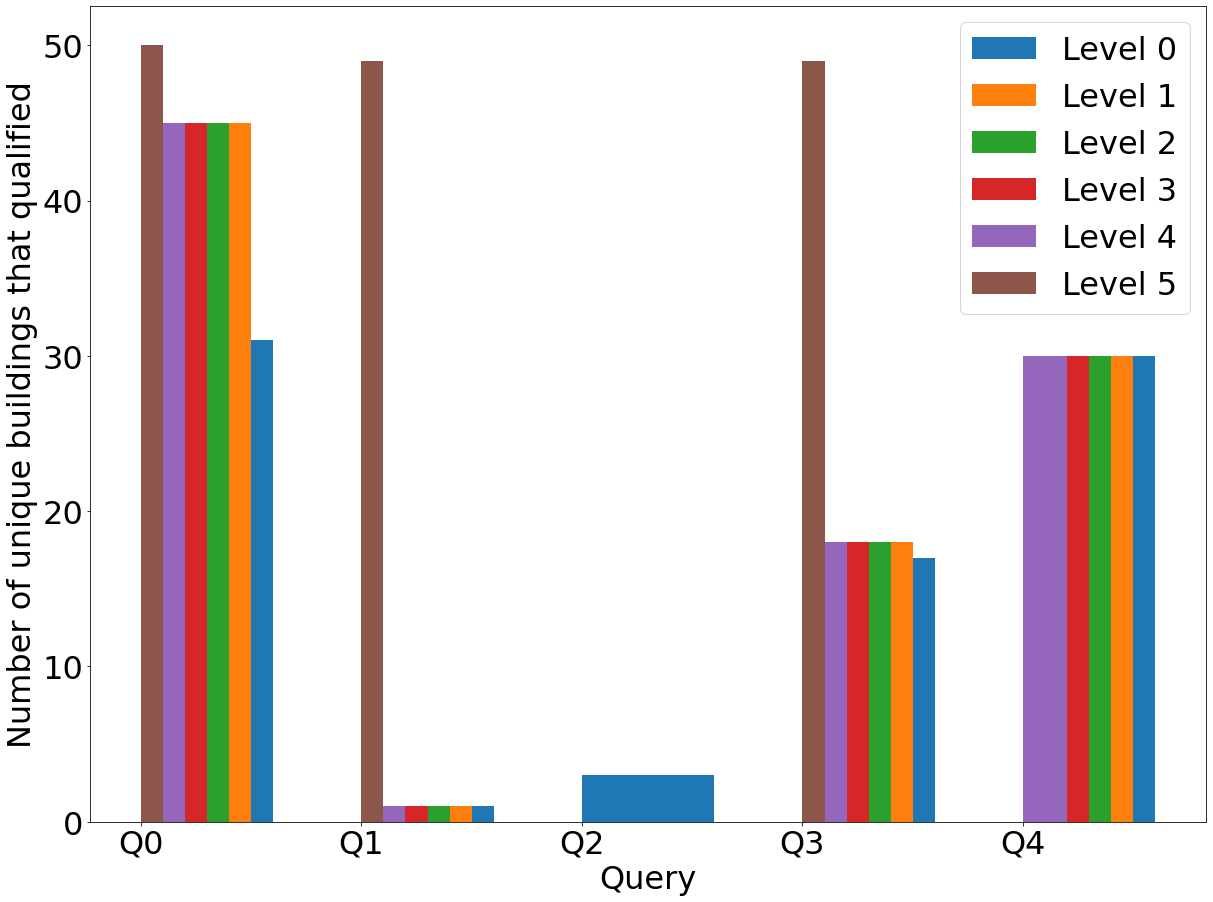

In [60]:
plt.Figure()
plt.rcParams['figure.figsize'] = [20, 15]
plt.bar(x=["Q"+str(q) for q in range(df0.shape[0])], height=df0.unique_buildings, label="Level 0", width=0.6, align='edge')
plt.bar(x=["Q"+str(q) for q in range(df0.shape[0])], height=df1.unique_buildings, label="Level 1", width=0.5, align='edge')
plt.bar(x=["Q"+str(q) for q in range(df0.shape[0])], height=df2.unique_buildings, label="Level 2", width=0.4, align='edge')
plt.bar(x=["Q"+str(q) for q in range(df0.shape[0])], height=df3.unique_buildings, label="Level 3", width=0.3, align='edge')
plt.bar(x=["Q"+str(q) for q in range(df0.shape[0])], height=df4.unique_buildings, label="Level 4", width=0.2, align='edge')
plt.bar(x=[str(q) for q in df0.index], height=df5.unique_buildings, label="Level 5", width=0.1, align='edge')
plt.xlabel("Query")
plt.ylabel("Number of unique buildings that qualified")
plt.legend()
plt.savefig('results/level01_qualified.pdf')

In [77]:
for q_idx in range(len(useful_queries2)):
    q = q1[useful_queries2[q_idx]]
    q = list(metrics.keys())[useful_queries2[q_idx]]
    print('query_size: {}'.format((metrics[q]['query_size'])))
    print('size_relaxed_graph: {}'.format((metrics[q]['size_relaxed_graph'])))
    print('relaxation_time: {}'.format(round(metrics[q]['relaxation_time'] * 1000, 2)))

query_size: 2
size_relaxed_graph: 12
relaxation_time: 0.71
query_size: 4
size_relaxed_graph: 60
relaxation_time: 1.65
query_size: 9
size_relaxed_graph: 1
relaxation_time: 1.82
query_size: 3
size_relaxed_graph: 36
relaxation_time: 1.25
query_size: 1
size_relaxed_graph: 6
relaxation_time: 0.36


In [185]:
query = q1[11]
print(query)
start_time = datetime.datetime.now()
G = get_fast_relaxed_graph(query=query, max_level=5)
end = datetime.datetime.now()

SELECT * WHERE {
    ?equip        rdf:type   brick:VAV .
    ?equip        brick:isFedBy+                 ?ahu .
    ?vlv          rdf:type                    brick:Valve .
    ?ahu          brick:hasPoint                 ?upstream_ta .
    ?equip        brick:hasPoint                 ?dnstream_ta .
    ?upstream_ta  rdf:type   brick:Supply_Air_Temperature_Sensor .
    ?dnstream_ta  rdf:type   brick:Supply_Air_Temperature_Sensor .
    ?equip        brick:hasPoint                 ?vlv .
    ?vlv          rdf:type   brick:Valve_Command
}


In [186]:
len(G.nodes().data())

3466

In [187]:
(end - start_time).total_seconds()*1000

564.379

In [ ]:
# avg similar score across top 3 for 1 building
# avg similar score across top 5 for 1 building
# avg similar score across top 10 for 1 building

## running example evaluation

In [212]:
file = "Data - Brick models/acad.ttl"

running_example = """SELECT * WHERE {
 ?sen   rdf:type   brick:Supply_Air_Temperature_Sensor .
 ?sp    rdf:type   brick:Supply_Air_Temperature_Setpoint .
 ?ahu   rdf:type   brick:AHU .
 ?ahu   brick:feeds ?thing .
 ?thing  brick:hasPoint ?sen .
 ?thing  brick:hasPoint ?sp .
}"""


In [213]:
max_level = 5
G = get_fast_relaxed_graph(query=running_example, max_level=max_level)

In [214]:
g = brickschema.Graph(load_brick=True)
g.load_file(file)
g.expand(profile="owlrl")
select_statement = query.split("{")[0] + "{\n"

In [220]:
total_instances = get_total_num_instances(g, 'brick:Equipment') + get_total_num_instances(g, 'brick:Location') + get_total_num_instances(g, 'brick:Point')
total_instances

1920

In [225]:
G = get_fast_relaxed_graph(query=running_example, max_level=max_level)
original_uuid = list(G.nodes())[0]
original_query = G.nodes()[original_uuid]['query']

scores = {}
scores2 = {}
node_num = 0
for idx, node in G.nodes().data():    
    relaxed_query = list(node['query'])
    score = sim_score(original_query, relaxed_query, g, total_instances)
    score2 = score
    
    if relaxed_query[0][2] == 'brick:Supply_Air_Temperature_Sensor':
        score2 = score2*0.5
    if relaxed_query[1][2] == 'brick:Supply_Air_Temperature_Setpoint':
        score2 = score2*0.5
    
    level = node['level']
    if score in scores:
        scores[score].append(relaxed_query)
    else:
        scores[score] = [relaxed_query]

    if score2 in scores2:
        scores2[score2].append(relaxed_query)
    else:
        scores2[score2] = [relaxed_query]
    node_num+=1


0  done
10  done
20  done
30  done
40  done
50  done
60  done
70  done
80  done
90  done
100  done
110  done
120  done
130  done
140  done
150  done
160  done
170  done
180  done
190  done
200  done
210  done
220  done
230  done
240  done
250  done
260  done
270  done
280  done
290  done
300  done
310  done
320  done
330  done
340  done
350  done
360  done
370  done
380  done
390  done
400  done
410  done
420  done
430  done
440  done
450  done
460  done
470  done
480  done
490  done
500  done
510  done
520  done
530  done
540  done
550  done
560  done
570  done
580  done
590  done
600  done
610  done
620  done
630  done
640  done
650  done
660  done
670  done
680  done
690  done
700  done
710  done
720  done
730  done
740  done
750  done
760  done
770  done
780  done
790  done
800  done
810  done
820  done
830  done
840  done
850  done
860  done
870  done
880  done
890  done
900  done
910  done
920  done
930  done
940  done
950  done
960  done
970  done
980  done
990  done
1000  done


In [226]:
original_query

[['?sen', 'rdf:type', 'brick:Supply_Air_Temperature_Sensor'],
 ['?sp', 'rdf:type', 'brick:Supply_Air_Temperature_Setpoint'],
 ['?ahu', 'rdf:type', 'brick:AHU'],
 ['?ahu', 'brick:feeds', '?thing'],
 ['?thing', 'brick:hasPoint', '?sen'],
 ['?thing', 'brick:hasPoint', '?sp']]

In [233]:
for score in sorted(list(scores.keys()), reverse = True):
    print(len(scores[score]))

9
8
8
16
7
7
16
4
15
11
4
4
1
15
11
8
5
1
26
5
1
1
5
4
1
1
16
6
5
1
1
1
1
1435
